# Analisis Sentimen Ulasan Aplikasi Shopee di google play store Menggunakan Metode Klasifikasi Algoritma Naive Bayes

# scraping data

In [67]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/
#download library google-play-scraper
!pip install google-play-scraper

# Impor paket yang diperlukan

In [68]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [69]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'id.co.bri.brimo',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi shopee yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=1000, # disini jumlah ulasan yang mau kita ambil ada seribu
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [70]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0b81a22c-6df1-425a-a7dc-9b55d6ea75d8,Hudaya Putra,https://play-lh.googleusercontent.com/a/ACg8oc...,aplikasi selalu close sendiri setelah 1 atau 2...,1,46,2.85.0,2025-07-19 23:56:35,"Hai Sobat BRI, mohon maaf atas ketidaknyamanan...",2025-07-20 00:41:20,2.85.0
1,08d24b39-ab79-4a7d-8a77-83add2a94d7a,Montok Gendut,https://play-lh.googleusercontent.com/a/ACg8oc...,Tolong diperbaiki terkait mutasi keluar masuk ...,1,2,2.85.0,2025-07-25 05:20:41,"Hai Sobat BRI, mohon maaf atas ketidaknyamanan...",2025-07-25 05:42:40,2.85.0
2,25b54e41-5526-4bce-bd75-3f220c00ffbc,Hery Mayor,https://play-lh.googleusercontent.com/a-/ALV-U...,Kenapa saat membuat pin Brimo selalu gagal (Ko...,1,26,2.85.0,2025-07-18 00:47:58,"Hai Sobat BRI, mohon maaf atas kendala yang di...",2025-07-18 00:49:09,2.85.0
3,f4500527-00be-4ead-af75-043976cfff2a,sony scn,https://play-lh.googleusercontent.com/a/ACg8oc...,brimo tombol qris tdk responsif ketika di pili...,1,53,2.84.0,2025-06-27 15:18:45,"Hai Sobat BRI, mohon maaf atas kendala yang di...",2025-06-27 18:15:49,2.84.0
4,d9085089-dac8-4051-8dea-8a20dc2fbe3b,Faiz Fikri,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi tidak bisa digunakan walau sudah upda...,2,47,2.85.0,2025-07-17 14:48:02,"Hai Sobat BRI, mohon maaf atas kendala yang di...",2025-07-17 19:54:31,2.85.0


In [71]:
len(df_busu.index) #kemudian hitung kembali berapa jumlah data yg didapatkan

1000

In [72]:
df_busu[['userName', 'score','at', 'content']].head()  #dari scrapping tsb didapatkan banyak sekali kolom, kemudian kolom" tsb kita filter
                                                        #sehingga didapatkan kolom username, score, at dan content

,userName,score,at,content
0,Hudaya Putra,1,2025-07-19 23:56:35,aplikasi selalu close sendiri setelah 1 atau 2...
1,Montok Gendut,1,2025-07-25 05:20:41,Tolong diperbaiki terkait mutasi keluar masuk ...
2,Hery Mayor,1,2025-07-18 00:47:58,Kenapa saat membuat pin Brimo selalu gagal (Ko...
3,sony scn,1,2025-06-27 15:18:45,brimo tombol qris tdk responsif ketika di pili...
4,Faiz Fikri,2,2025-07-17 14:48:02,Aplikasi tidak bisa digunakan walau sudah upda...


In [73]:
#Run This Code to Sort the Data By Date

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
637,Danang Rizal,2,2025-07-26 12:33:34,aplikasi sepertinya tidak kompatibel dengan an...
115,Nur Qoyyum,4,2025-07-26 11:10:31,mohon perbaikan sekarg ketika ada transaksi ti...
121,Zay Koben,1,2025-07-26 09:41:12,udah beberapa kali foto ktp tapi gagal trus..s...
147,rahmawati drrk,1,2025-07-26 09:12:08,"pelayanan lambat, mau topup shopee malah keter..."
454,Yayan Hidayat Yayan Hidayat,1,2025-07-26 06:54:04,kalaw mau login terlalu banyak iklan nya sanga...


In [74]:
my_df = sorted_df[['userName', 'score','at', 'content']] #kemudian kita simpan ke variabel my_df

In [75]:
my_df=my_df[['content', 'score']]#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score.


In [76]:
my_df.head()

,content,score
637,aplikasi sepertinya tidak kompatibel dengan an...,2
115,mohon perbaikan sekarg ketika ada transaksi ti...,4
121,udah beberapa kali foto ktp tapi gagal trus..s...,1
147,"pelayanan lambat, mau topup shopee malah keter...",1
454,kalaw mau login terlalu banyak iklan nya sanga...,1


# PELABELAN

In [77]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

,content,score,Label
637,aplikasi sepertinya tidak kompatibel dengan an...,2,Negatif
115,mohon perbaikan sekarg ketika ada transaksi ti...,4,Positif
121,udah beberapa kali foto ktp tapi gagal trus..s...,1,Negatif
147,"pelayanan lambat, mau topup shopee malah keter...",1,Negatif
454,kalaw mau login terlalu banyak iklan nya sanga...,1,Negatif
583,min masih sering force close sudah clear data ...,5,Positif
603,kenapa saat daftar brimo tidak ada sinyal teru...,1,Negatif
624,aplikasi ini sangat membantu cuman saya sarank...,5,Positif
600,bri tau gak si ini aplikasi sering crash. seti...,1,Negatif
133,tolong bank BRI saya merasa dirugikan dengan p...,1,Negatif


In [78]:
my_df.to_csv("scrapped_dataBrimo.csv", index = False)  #kemudian save menjadi file csv

# pembersihan data
# data cleaning

In [79]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/scrapped_dataBrimo.csv')
my_df.head(50)

,content,score,Label
0,aplikasi sepertinya tidak kompatibel dengan an...,2,Negatif
1,mohon perbaikan sekarg ketika ada transaksi ti...,4,Positif
2,udah beberapa kali foto ktp tapi gagal trus..s...,1,Negatif
3,"pelayanan lambat, mau topup shopee malah keter...",1,Negatif
4,kalaw mau login terlalu banyak iklan nya sanga...,1,Negatif
5,min masih sering force close sudah clear data ...,5,Positif
6,kenapa saat daftar brimo tidak ada sinyal teru...,1,Negatif
7,aplikasi ini sangat membantu cuman saya sarank...,5,Positif
8,bri tau gak si ini aplikasi sering crash. seti...,1,Negatif
9,tolong bank BRI saya merasa dirugikan dengan p...,1,Negatif


In [80]:
# info() digunakan untuk menampilkan informasi detail tentang dataframe,
#seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya.
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
 1   score    1000 non-null   int64 
 2   Label    890 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [81]:
#Tampilkan setiap baris yang memiliki nilai null (NaN) pada kolom apapun
#Gunakan fitur isna() yang disediakan library pandas
my_df.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,True
996,False,False,False
997,False,False,False
998,False,False,False


In [82]:
my_df.isna().any()

,0
content,False
score,False
Label,True


In [83]:
my_df.describe()

,score
count,1000.000000
mean,2.508000
std,1.645796
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [84]:
#mencari jumlah baris data yang bernilai null
#terdapat kolom label memiliki nilai kosong
my_df.isnull().sum()

,0
content,0
score,0
Label,110


# 1. Handling Missing value-Ignore tuple


In [85]:
my_df.dropna(subset=['Label'],inplace = True)

In [86]:
my_df.isnull().sum()

,0
content,0
score,0
Label,0


In [87]:
my_df.head(50)

,content,score,Label
0,aplikasi sepertinya tidak kompatibel dengan an...,2,Negatif
1,mohon perbaikan sekarg ketika ada transaksi ti...,4,Positif
2,udah beberapa kali foto ktp tapi gagal trus..s...,1,Negatif
3,"pelayanan lambat, mau topup shopee malah keter...",1,Negatif
4,kalaw mau login terlalu banyak iklan nya sanga...,1,Negatif
5,min masih sering force close sudah clear data ...,5,Positif
6,kenapa saat daftar brimo tidak ada sinyal teru...,1,Negatif
7,aplikasi ini sangat membantu cuman saya sarank...,5,Positif
8,bri tau gak si ini aplikasi sering crash. seti...,1,Negatif
9,tolong bank BRI saya merasa dirugikan dengan p...,1,Negatif


In [88]:
my_df.to_csv("Brimopreprocessing.csv", index = False)  #simpan hasil file data cleaning dengan nama shopeepreprocessing.csv

# Text PreProcessing

In [89]:
import pandas as pd
# Remove the line below to prevent overwriting data_clean
# df = pd.read_csv('/content/Brimopreprocessing.csv')
# Use the existing data_clean DataFrame
pd.set_option('display.max_columns', None)
# my_df = pd.read_csv('/content/scrapped_dataBrimo.csv') # This line is also not needed as we are using data_clean
my_df.head(50)

,content,score,Label
0,aplikasi sepertinya tidak kompatibel dengan an...,2,Negatif
1,mohon perbaikan sekarg ketika ada transaksi ti...,4,Positif
2,udah beberapa kali foto ktp tapi gagal trus..s...,1,Negatif
3,"pelayanan lambat, mau topup shopee malah keter...",1,Negatif
4,kalaw mau login terlalu banyak iklan nya sanga...,1,Negatif
5,min masih sering force close sudah clear data ...,5,Positif
6,kenapa saat daftar brimo tidak ada sinyal teru...,1,Negatif
7,aplikasi ini sangat membantu cuman saya sarank...,5,Positif
8,bri tau gak si ini aplikasi sering crash. seti...,1,Negatif
9,tolong bank BRI saya merasa dirugikan dengan p...,1,Negatif


# Case Folding
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.

In [90]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [91]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)


,content,score,Label,text_clean
0,aplikasi sepertinya tidak kompatibel dengan an...,2,Negatif,aplikasi sepertinya tidak kompatibel dengan an...
1,mohon perbaikan sekarg ketika ada transaksi ti...,4,Positif,mohon perbaikan sekarg ketika ada transaksi ti...
2,udah beberapa kali foto ktp tapi gagal trus..s...,1,Negatif,udah beberapa kali foto ktp tapi gagal trussur...
3,"pelayanan lambat, mau topup shopee malah keter...",1,Negatif,pelayanan lambat mau topup shopee malah ketera...
4,kalaw mau login terlalu banyak iklan nya sanga...,1,Negatif,kalaw mau login terlalu banyak iklan nya sanga...
5,min masih sering force close sudah clear data ...,5,Positif,min masih sering force close sudah clear data ...
6,kenapa saat daftar brimo tidak ada sinyal teru...,1,Negatif,kenapa saat daftar brimo tidak ada sinyal teru...
7,aplikasi ini sangat membantu cuman saya sarank...,5,Positif,aplikasi ini sangat membantu cuman saya sarank...
8,bri tau gak si ini aplikasi sering crash. seti...,1,Negatif,bri tau gak si ini aplikasi sering crash setia...
9,tolong bank BRI saya merasa dirugikan dengan p...,1,Negatif,tolong bank bri saya merasa dirugikan dengan p...


# Stopword Removal
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [92]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
stop.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'anj', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', 'ku',
                       '&amp', 'yah', 'jgn', 'ga', 'ok', 'bgt', 'banget', 'jg',
                       'gw','guys','gtu','fyi','epek',
                       'iya','aja','sih','iyaa','tpi','udh','ga','ngga','nggak'
                       ,'yeeha','itu','ituu','tpi','giniii','kaan','pas',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nyesel', 'habis','download','iyaah',
                       'nanya','yaa','tcodtaf','ccq','google','yo','gada','gue','udah','blm','cakep','beneran','dah',
                       'sender','baru','lagi','maen','tbtb','woy','lagi','lg','lgi','njir','kocak','wkwk','naseh','nan',
                       'tcok','cok','nntn','sengaja','bru', 'ypadahal', 'cokk', 'utuk','untuk', 'kasih','sangatsangat','sanggat', 'the',
                       'mulu','jd','jdi','gk','oe', 'contoh', 'ini', 'adalah', 'Teks', 'juga'
                        ])
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,Label,text_clean,text_StopWord
0,aplikasi sepertinya tidak kompatibel dengan an...,2,Negatif,aplikasi sepertinya tidak kompatibel dengan an...,aplikasi kompatibel android sendri pindah hp a...
1,mohon perbaikan sekarg ketika ada transaksi ti...,4,Positif,mohon perbaikan sekarg ketika ada transaksi ti...,mohon perbaikan sekarg transaksi muncul notifi...
2,udah beberapa kali foto ktp tapi gagal trus..s...,1,Negatif,udah beberapa kali foto ktp tapi gagal trussur...,kali foto ktp gagal trussuruh ulangi trusharus...
3,"pelayanan lambat, mau topup shopee malah keter...",1,Negatif,pelayanan lambat mau topup shopee malah ketera...,pelayanan lambat topup shopee keterangan dipro...
4,kalaw mau login terlalu banyak iklan nya sanga...,1,Negatif,kalaw mau login terlalu banyak iklan nya sanga...,kalaw login iklan tergganggu login tingkat bri...
5,min masih sering force close sudah clear data ...,5,Positif,min masih sering force close sudah clear data ...,min force close clear data kali buka force clo...
6,kenapa saat daftar brimo tidak ada sinyal teru...,1,Negatif,kenapa saat daftar brimo tidak ada sinyal teru...,daftar brimo sinyal sinyal penuh kamera izinka...
7,aplikasi ini sangat membantu cuman saya sarank...,5,Positif,aplikasi ini sangat membantu cuman saya sarank...,aplikasi membantu cuman sarankan tambahkan fit...
8,bri tau gak si ini aplikasi sering crash. seti...,1,Negatif,bri tau gak si ini aplikasi sering crash setia...,bri aplikasi crash login berulang ulang anehny...
9,tolong bank BRI saya merasa dirugikan dengan p...,1,Negatif,tolong bank bri saya merasa dirugikan dengan p...,tolong bank bri dirugikan pemotongan saldo kad...


# Tokenizing
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [93]:
import nltk
# nltk.download('punkt') # punkt is already downloaded
from nltk.tokenize import sent_tokenize, word_tokenize

# Use simple whitespace tokenization as an alternative
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: x.split())

data_clean.head()

,content,score,Label,text_clean,text_StopWord,text_tokens
0,aplikasi sepertinya tidak kompatibel dengan an...,2,Negatif,aplikasi sepertinya tidak kompatibel dengan an...,aplikasi kompatibel android sendri pindah hp a...,"[aplikasi, kompatibel, android, sendri, pindah..."
1,mohon perbaikan sekarg ketika ada transaksi ti...,4,Positif,mohon perbaikan sekarg ketika ada transaksi ti...,mohon perbaikan sekarg transaksi muncul notifi...,"[mohon, perbaikan, sekarg, transaksi, muncul, ..."
2,udah beberapa kali foto ktp tapi gagal trus..s...,1,Negatif,udah beberapa kali foto ktp tapi gagal trussur...,kali foto ktp gagal trussuruh ulangi trusharus...,"[kali, foto, ktp, gagal, trussuruh, ulangi, tr..."
3,"pelayanan lambat, mau topup shopee malah keter...",1,Negatif,pelayanan lambat mau topup shopee malah ketera...,pelayanan lambat topup shopee keterangan dipro...,"[pelayanan, lambat, topup, shopee, keterangan,..."
4,kalaw mau login terlalu banyak iklan nya sanga...,1,Negatif,kalaw mau login terlalu banyak iklan nya sanga...,kalaw login iklan tergganggu login tingkat bri...,"[kalaw, login, iklan, tergganggu, login, tingk..."


# Stemming
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [94]:
!pip install Sastrawi

In [95]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [96]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

3325
------------------------
1 : aplikasi : aplikasi
2 : kompatibel : kompatibel
3 : android : android
4 : sendri : sendri
5 : pindah : pindah
6 : hp : hp
7 : lancar : lancar
8 : mohon : mohon
9 : tindak : tindak
10 : lanjuti : lanjut
11 : perbaikan : baik
12 : sekarg : sekarg
13 : transaksi : transaksi
14 : muncul : muncul
15 : notifikasi : notifikasi
16 : brimo : brimo
17 : iklan : iklan
18 : promo : promo
19 : produk : produk
20 : kembalikan : kembali
21 : kali : kali
22 : foto : foto
23 : ktp : ktp
24 : gagal : gagal
25 : trussuruh : trussuruh
26 : ulangi : ulang
27 : trusharus : trusharus
28 : presisi : presisi
29 : ktpnyaga : ktpnyaga
30 : ngrti : ngrti
31 : lagiprasaan : lagiprasaan
32 : ikutin : ikutin
33 : langkahnya : langkah
34 : dngn : dngn
35 : nyoba : nyoba
36 : bisakenapa : bisakenapa
37 : persulit : sulit
38 : rekening : rekening
39 : jugaribet : jugaribet
40 : verifikasi : verifikasi
41 : pelayanan : layan
42 : lambat : lambat
43 : topup : topup
44 : shopee : shopee
4

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,aplikasi sepertinya tidak kompatibel dengan an...,2,Negatif,aplikasi sepertinya tidak kompatibel dengan an...,aplikasi kompatibel android sendri pindah hp a...,"[aplikasi, kompatibel, android, sendri, pindah...",aplikasi kompatibel android sendri pindah hp a...
1,mohon perbaikan sekarg ketika ada transaksi ti...,4,Positif,mohon perbaikan sekarg ketika ada transaksi ti...,mohon perbaikan sekarg transaksi muncul notifi...,"[mohon, perbaikan, sekarg, transaksi, muncul, ...",mohon baik sekarg transaksi muncul notifikasi ...
2,udah beberapa kali foto ktp tapi gagal trus..s...,1,Negatif,udah beberapa kali foto ktp tapi gagal trussur...,kali foto ktp gagal trussuruh ulangi trusharus...,"[kali, foto, ktp, gagal, trussuruh, ulangi, tr...",kali foto ktp gagal trussuruh ulang trusharus ...
3,"pelayanan lambat, mau topup shopee malah keter...",1,Negatif,pelayanan lambat mau topup shopee malah ketera...,pelayanan lambat topup shopee keterangan dipro...,"[pelayanan, lambat, topup, shopee, keterangan,...",layan lambat topup shopee terang proses x jam ...
4,kalaw mau login terlalu banyak iklan nya sanga...,1,Negatif,kalaw mau login terlalu banyak iklan nya sanga...,kalaw login iklan tergganggu login tingkat bri...,"[kalaw, login, iklan, tergganggu, login, tingk...",kalaw login iklan tergganggu login tingkat bri...
5,min masih sering force close sudah clear data ...,5,Positif,min masih sering force close sudah clear data ...,min force close clear data kali buka force clo...,"[min, force, close, clear, data, kali, buka, f...",min force close clear data kali buka force clo...
6,kenapa saat daftar brimo tidak ada sinyal teru...,1,Negatif,kenapa saat daftar brimo tidak ada sinyal teru...,daftar brimo sinyal sinyal penuh kamera izinka...,"[daftar, brimo, sinyal, sinyal, penuh, kamera,...",daftar brimo sinyal sinyal penuh kamera izin a...
7,aplikasi ini sangat membantu cuman saya sarank...,5,Positif,aplikasi ini sangat membantu cuman saya sarank...,aplikasi membantu cuman sarankan tambahkan fit...,"[aplikasi, membantu, cuman, sarankan, tambahka...",aplikasi bantu cuman saran tambah fitur beli p...
8,bri tau gak si ini aplikasi sering crash. seti...,1,Negatif,bri tau gak si ini aplikasi sering crash setia...,bri aplikasi crash login berulang ulang anehny...,"[bri, aplikasi, crash, login, berulang, ulang,...",bri aplikasi crash login ulang ulang aneh biar...
9,tolong bank BRI saya merasa dirugikan dengan p...,1,Negatif,tolong bank bri saya merasa dirugikan dengan p...,tolong bank bri dirugikan pemotongan saldo kad...,"[tolong, bank, bri, dirugikan, pemotongan, sal...",tolong bank bri rugi potong saldo kadang mingg...


In [97]:
data_clean.to_csv('hasil_TextPreProcessing_Brimo.csv', index= False) #kemudian simpan hasil text preprocessing ke file csv

In [98]:
#disini kita importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

spliting data

memecah data test 20% dari keseluruhan data

In [99]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

pembobotan tf-idf

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


In [101]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712,)
(712,)
(178,)
(178,)


In [102]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [103]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [104]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)


MultinomialNB()

In [105]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [106]:
y_pred = nb.predict(tfidf_test)


In [107]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)


In [108]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_Brimo.csv')

#


MultinomialNB Accuracy: 0.8033707865168539
MultinomialNB Precision: 0.7872340425531915
MultinomialNB Recall: 0.9568965517241379
MultinomialNB f1_score: 0.8638132295719845
confusion_matrix:
 [[111   5]
 [ 30  32]]

              precision    recall  f1-score   support

     Negatif       0.79      0.96      0.86       116
     Positif       0.86      0.52      0.65        62

    accuracy                           0.80       178
   macro avg       0.83      0.74      0.76       178
weighted avg       0.81      0.80      0.79       178



In [109]:
df_results = pd.DataFrame({'True_Label': y_test, 'Predicted_Label': predicted})

In [110]:
# Count occurrences of each sentiment
sentiment_counts = df_results['Predicted_Label'].value_counts()

In [111]:
# Count occurrences of each sentiment
sentiment_counts = df_results['Predicted_Label'].value_counts()

VISUALISASI (NLP)

In [112]:
import matplotlib.pyplot as plt

/tmp/ipython-input-113-3958386344.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sentimen_data = pd.value_counts(data_clean["Label"], sort=True)


<function matplotlib.pyplot.show(close=None, block=None)>

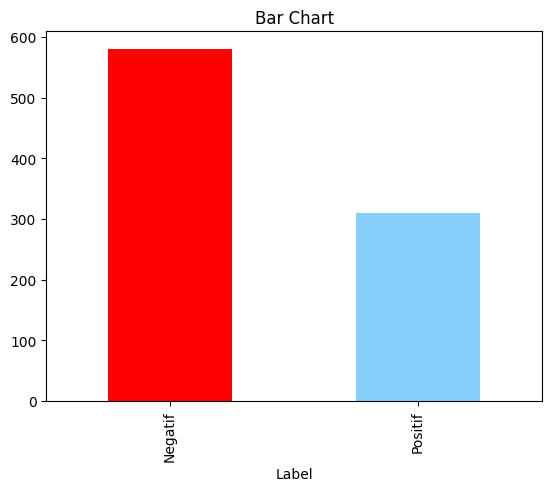

In [113]:
sentimen_data = pd.value_counts(data_clean["Label"], sort=True)
sentimen_data.plot(kind='bar', color=['red','lightskyblue'])
plt.title("Bar Chart")
plt.show

In [114]:
train_s1 = data_clean[data_clean["Label"] == "Negatif"][['content', 'score', 'Label', 'text_clean', 'text_StopWord', 'text_tokens', 'text_steamindo']].copy()
train_s1["text_steamindo"] = train_s1["text_steamindo"].fillna("Tidak ada komentar")

In [115]:
# This cell is no longer needed as the fillna operation is combined with the previous cell.

In [116]:
train_s1.count()

,0
content,580
score,580
Label,580
text_clean,580
text_StopWord,580
text_tokens,580
text_steamindo,580


In [117]:
# Membagi teks menjadi kata-kata
kata_steamindo = train_s1['text_steamindo'].str.split()

# Menghitung jumlah kata dalam setiap entri
jumlah_kata_steamindo = kata_steamindo.apply(len)

# Menghitung total kata dalam semua entri
total_kata_steamindo = jumlah_kata_steamindo.sum()

# Menampilkan total kata
print("Total kata dalam kolom text_steamindo:", total_kata_steamindo)

Total kata dalam kolom text_steamindo: 10280


In [118]:
from wordcloud import WordCloud

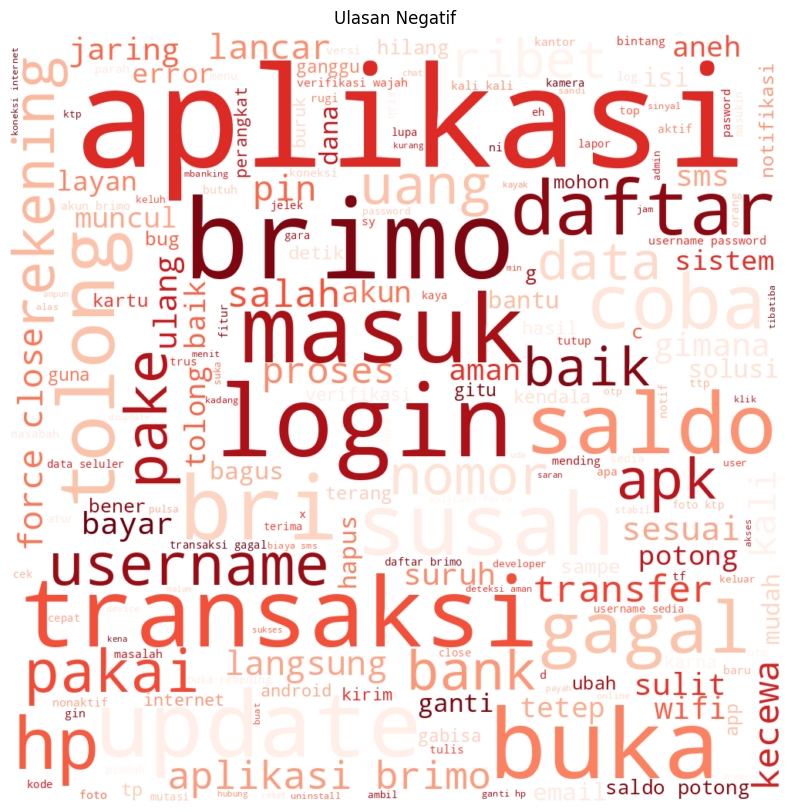

In [119]:
Sentimen_negatif = ' '.join(word for word in train_s1["text_steamindo"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(Sentimen_negatif)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Negatif")
plt.margins(x=0, y=0)
plt.show()

In [120]:
train_s2 = data_clean[data_clean["Label"] == "Positif"]

In [121]:
train_s2["text_steamindo"] = train_s2["text_steamindo"].fillna("Tidak ada komentar")

/tmp/ipython-input-121-431468881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s2["text_steamindo"] = train_s2["text_steamindo"].fillna("Tidak ada komentar")


In [122]:
train_s2.count()

,0
content,310
score,310
Label,310
text_clean,310
text_StopWord,309
text_tokens,310
text_steamindo,310


In [123]:
# Membagi teks menjadi kata-kata
kata_steamindo = train_s2['text_steamindo'].str.split()

# Menghitung jumlah kata dalam setiap entri
jumlah_kata_steamindo = kata_steamindo.apply(len)

# Menghitung total kata dalam semua entri
total_kata_steamindo = jumlah_kata_steamindo.sum()

# Menampilkan total kata
print("Total kata dalam kolom text_steamindo:", total_kata_steamindo)

Total kata dalam kolom text_steamindo: 4779


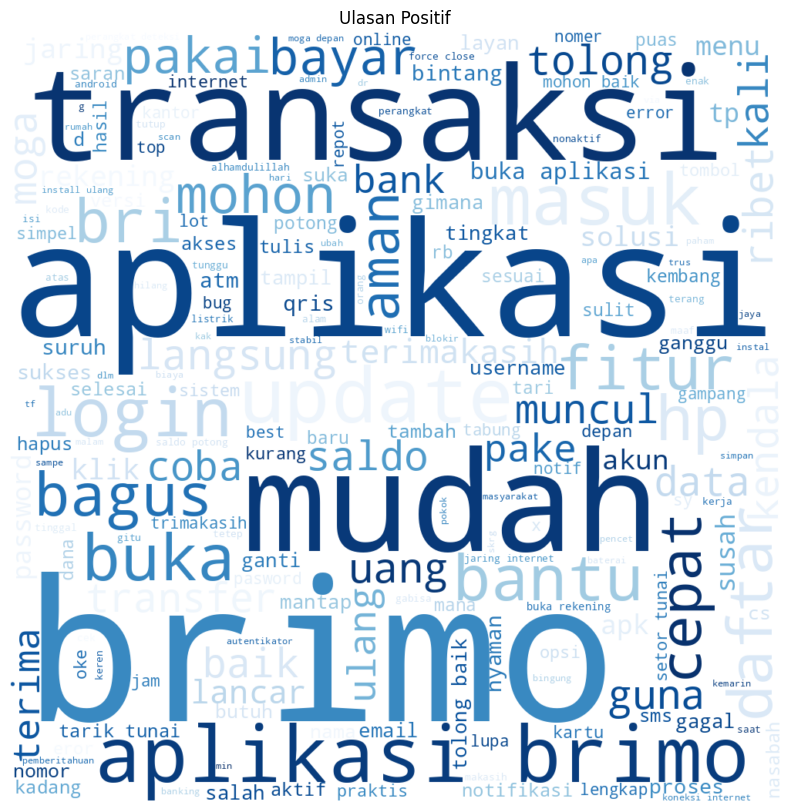

In [124]:
Sentimen_positif = ' '.join(word for word in train_s2["text_steamindo"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(Sentimen_positif)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()